# Introduction and Scoping

CDP’s questionnaires clarify how cities and corporations across various regions operate.  Moreover, the surveys detail how and to what extent these organizations anticipate and plan for varied risks and opportunities arising from climate change and the climate transition.  Generic, large-scale climate-related indicators, such as socioeconomic vulnerability indices and physical risk maps, have already been developed at country and regional levels.  For new KPIs to effectively leverage the detail within CDP’s survey data while progressing the current state of research on climate-related social and environmental risks, they should use the information unique to CDP questionnaires to assess related risks and organizations’ responses to them. The relevant questionnaire responses change with each type of risk under consideration.

For this project, we developed KPIs for cities’ water-related risks, and risks of saltwater intrusion from sea level rise specifically, as an example of how to develop new, risk-specific KPIs which use unique insights from CDP survey data. We mapped these city-level KPIs alongside corporate facilities to compare both facilities’ water use and their proximity to cities with potential for water-related risks. Finally, this information was overlaid with conventional, large-scale socioeconomic and environmental indices by country to draw comparisons and see how social and environmental factors at different scales are reflected.

Cities Water-related Risks Interactive Map:
https://public.flourish.studio/visualisation/4540182/

Business Facility Water Usage Interactive Map:
https://public.flourish.studio/visualisation/4542747/

# Data

We used the following data sources.

CDP city and corporate water security questionnaires
- **2020_Full_Cities_Dataset.csv**
- **2020_Full_Water_Security_Dataset.csv**

Country-level socioeconomic and environmental statistics and indices
- https://www.kaggle.com/seraphimstreets/environmentequity-starterpack

Coastline shapefile
- https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-coastline/

Countries WGS84 shapefile
- https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1?geometry=-154.687%2C-69.567%2C178.594%2C81.347

Flourish GNI and population data
- https://flourish.studio/

# Methodology

The objective of our project is to determine the potential susceptibility of CDP-disclosing cities and corporations to risk from the intrusion of saltwater into water sources and analyze the vulnerability of their populations to the harmful effects of diminishing clean potable water supply. In order to do this with the available data, we need to: 

1. Determine the location of CDP-disclosing cities and corporations. 
2. Determine the distances of cities from the primary source of saltwater, seacoasts. 
3. Identify the sources of their water supply. 
4. Determine the fraction of city populations with access to potable water.
5. Design and compute KPIs for cities’ water-related risks, and risks of saltwater intrusion from sea level rise specifically, as an example of how to develop new, risk-specific KPIs which use unique insights from CDP survey data.
6. Compare social indicators on the country level with KPI indicators on the city level, and water usage by business facilities.

### Data preparation

We used Microsoft Excel, ArcMap, Python, and pandas to extract all relevant data from the various datasets and prepare them for further processing and analysis. Our use of Python scripts, such as converting data points to UTF-8 readable language or joining files based on a common column name, was largely for data prep and not central to the analysis, so we opted not to include them in this notebook. 

#### City

Using Excel, we extracted from **2020_Full_Cities_Dataset.csv** for each CDP-disclosing city: 
- water supply source
- fraction of water supply from groundwater
- fraction of the population with potable water
- the status of a publicly available water resource management strategy

We then applied Excel's Geography data type feature to obtain the latitudes and longitudes of most of the cities. For the remaining approximately 200 cities that Excel could not interpret or find in its database we manually searched for their locations using Google Maps. In this way we assembled a table with the following data: 
- CDP-disclosed organization name
- city name
- name of the country where the city is located
- latitude
- longitude
- water supply source
- fraction of the population with potable water
- the status of a publicly available water resource management strategy 

This gives us all of the quantitative CDP data we need. We are also interested in extracting qualitative water risk and risk management data to accompany it. To that end, we ran a Python script to create a pivot table from **2020_Full_Cities_Dataset.csv** containing a column for each of the most relevant water security questions, 14.2 through 14.4. This table also contains a column indicating the organization name, country, latitude, and longitude. 

#### Corporation

Using pandas we filtered **2020_Full_Water_Security_Dataset.csv** to the rows corresponding to a corporate facility with latitude and longitude provided. We then further filtered to those rows indicating for a given corporate facility: 
- its name
- latitude
- longitude
- renewable withdrawals from groundwater
- non-renewable withdrawals from groundwater
- discharges to groundwater
- total water discharges
- total water withdrawals
- total water consumption
- whether its located in area with water stress
We then pivoted the resulting table into a table with a column for each of the above data points and a row for each corporate facility. In addition to the above data, there is also a column for the organization, that is, corporation name. 

#### Country

We explored the following datasets from this source: https://www.kaggle.com/seraphimstreets/environmentequity-starterpack

After reviewing them, we decided to compare our KPI and facility water use data with Income Group by Country (2020) and Climate Readiness Score by Country (2015). Other datasets explored were often missing data points for the 251 countries, or not wholly relevant to our questions, thus they were not included.

1. Climate vulnerability 2015 (166 of 251 countries have a climate vulnerability score), which includes the following:  
Droughts, storms, epidemics, landslides, floods, wildfires (yes/no)  
Pop living below national poverty line  
Climate readiness score  
Climate risk score  
Vulnerability score
2. Ease of doing business World Bank (2018-2020)
3. % Living in slums World Bank (1990-2018)
4. % With piped water resources (from percent access to basic services) World Bank (1990-2018)
5. Gini index (incomplete dataset - 2015 has 80 countries, 2016 has 76 countries, 2017 has 67 countries, 2018 only has 29 countries)  
Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.
7. Income group WB (high, low), World Bank (2020)   
The World Bank classifies the world's economies into four income groups — high, upper-middle, lower-middle, and low. We base this assignment on Gross National Income (GNI) per capita (current US$). This is the most recent version of this classification 
8. Other variables explored: income per capita, gdp by region, education by region, corporation WRI sustainable financing 2019, corporate knights top 100 sustainable companies, fossil fuel prices, renewable energy stats, green growth indicators by country, health and deaths,statistical costs of premature deaths due to environmental risks by country, pollution rate v GDP by country

### Data processing and KPI calculation

To develop our KPIs, we defined the following variables based on CDP survey responses and latitude-longitude coordinates:

1. Coastal or non-coastal designation (C)  
Could be 1 (≤100km from coast) or 0 (>100km from coast)

2. Saltwater intrusion potential (S)  
Fraction of water supply sourced from groundwater (G)  
Relevant CDP Question Number: 14  
S = C x G  
Interpretation: A coastal city is potentially vulnerable to saltwater intrusion to the extent that it sources from groundwater aquifers.

3. Potential for Risks to Water Access from Saltwater Intrusion (A)  
Fraction of population with potable water access (N)  
Relevant CDP Question Number: 14.1  
A = C x G x 1/sqrt(N) = S / sqrt(N)  
Interpretation: A coastal city potentially faces risks to water access to the extent that it sources from groundwater, and this risk is compounded to the extent that fewer people already have potable water access.

Here, S and A were calculated as two key performance indicators, hereafter referred to as the saltwater intrusion potential and the potential for risks to water access from saltwater intrusion. “Potential” is a key word here: Since we are not examining all of the relevant variables necessary to determine saltwater intrusion risks (such as water table height, well placement and depth, local geology and permeability, and local water consumption forecasts), these KPIs are meant to indicate which cities potentially face risks of saltwater intrusion and future water access, given some relevant variables: the city location, its water supply source, and the population fraction which currently lacks potable water supply.

### Mapping and visualizing our results

There were 566 cities that disclosed their data to CDP in 2020.

We determined the distances from these cities to the coastline using the “Near” function on ArcMap. Cities under 100 km had a score of 1 in the KPI calculations for risk of saltwater intrusion.

Corporate facility locations were verified using ArcMap.

Country level statistics were downloaded, cleaned of unnecessary data using Excel, and matched by name to the country level shapefile. 

Business and city level KPI were compared with relevant data.

The city and business locations were then mapped on Flourish studio for interactive visualizations.


# Results

Cities Water-related Risks Interactive Map:
https://public.flourish.studio/visualisation/4540182/


Business Facility Water Usage Interactive Map:
https://public.flourish.studio/visualisation/4542747/

ArcMap Visualization Comparisons

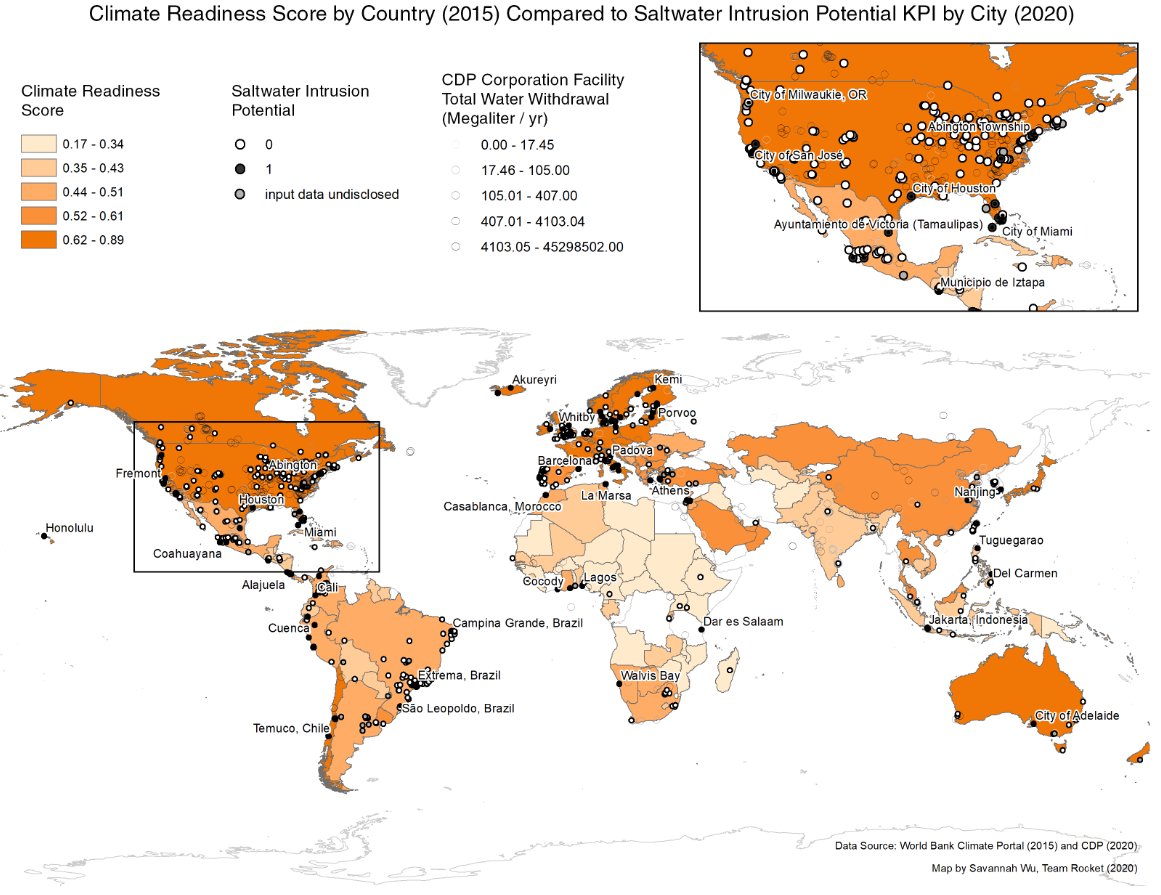

Above, we mapped CDP-disclosing cities (larger opaque outlined circles) and corporate facilities (smaller translucent circles) over countries shaded according to their climate readiness score. The shading of the cities and facilities indicates their saltwater intrusion potential and total water withdrawal rate, respectively. This map enables us to compare risks to water access due to saltwater intrusion for cities and corporations with the readiness of the country where those organizations are located to manage and mitigate climate change and its impacts. 

Cities located in areas with potential for saltwater intrusion and part of countries with low climate readiness have a more pressing need for further investigating the risk of saltwater intrusion into their water sources, developing a plan to mitigate this risk, and possibly seeking increased funding and other resources to put such a plan in action. Corporations that operate facilities withdrawing high amounts of water each year from around such cities also have a greater impetus to consider mitigation and diversification measures given their high reliance on extracting large amounts of water from the at-risk local environment. This is especially true for corporations with facilities that use substantial amounts of groundwater. The map shines a light on the cities and corporations to which these observations apply. 

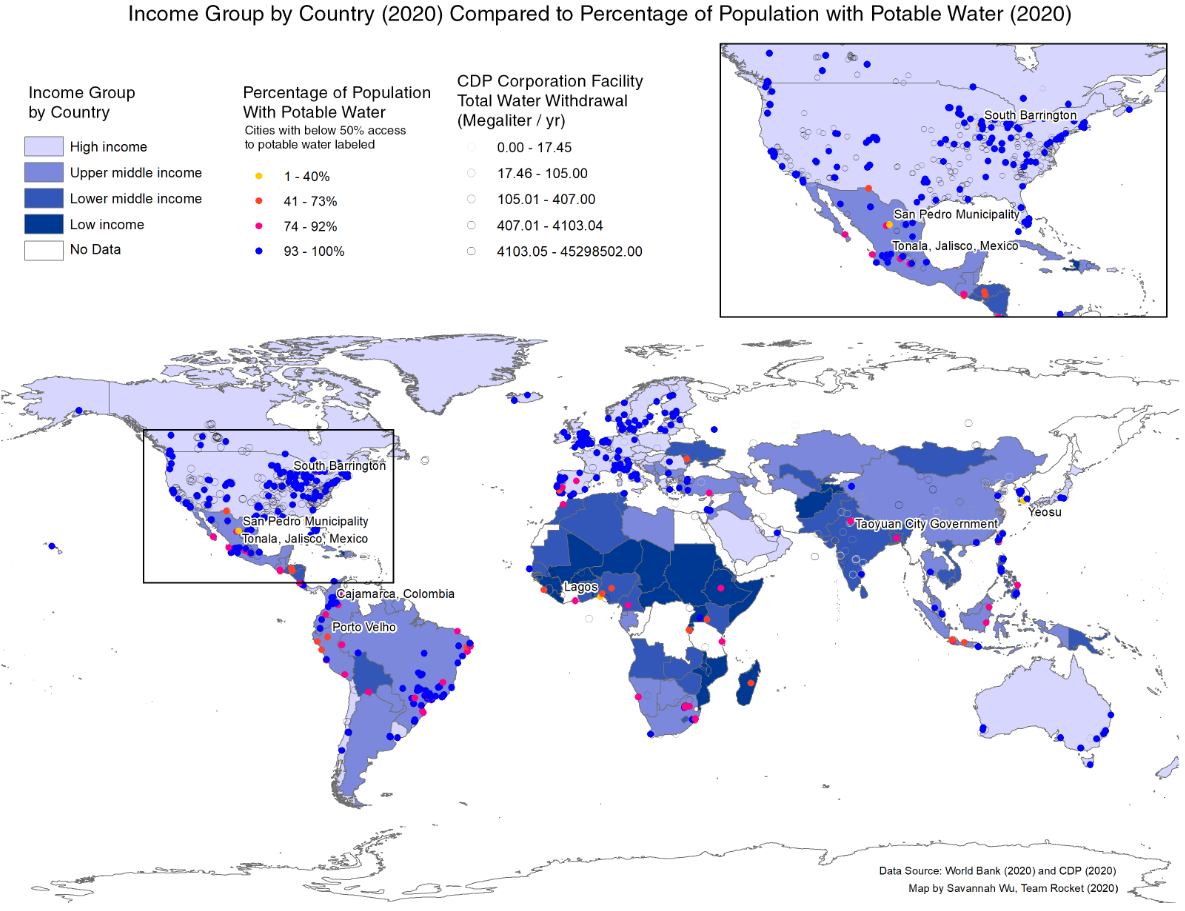

Above, we mapped CDP-disclosing cities (larger opaque outlined circles) and corporate facilities (smaller translucent circles) over countries shaded according to their income group. The shading of the cities here indicates the percentage of their population without access to potable water. This map enables us to compare vulnerability to water insecurity along two different dimensions: potable water access and income level. 

This map highlights where water risk mitigation efforts and resources should be concentrated: on cities with low levels of potable water access and low or lower middle income (per capita). These cities are especially vulnerable to the risks of water insecurity brought about by climate change, in particular sea level rise. It also serves to highlight those cities with high income and high levels of potable water access that are not nearly as vulnerable to water insecurity. 

# Conclusion & Recommendations
1. Cities should ideally submit their location in longitude and latitude coordinates so that they can be mapped and compared accurately; the most reliable source of this data would be the cities themselves. 
2. The data collection methodology for categories such as water usage or plans to respond to risk should be coded, and CDP can aim to require certain fields to be mandatory so that data can be comparable across cities and regions. Otherwise, conclusions are tentative and only relevant to the cities that have more comprehensive disclosure practices.
3. Environmental-social equity issues vary over time and between places, from forced migration of indigenous peoples to pollutant dumping in poor neighborhoods and droughts in agriculture-dependent countries.  Using numerical KPIs to assess these varied, intersectional issues may obscure more than they clarify.  We attempted to make our KPIs specific to the issue of water availability, while allowing for more qualitative information by displaying it upon hovering over cities in the interactive map.  Interviews may supplement standardized questionnaires in future research.
